In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import statsmodels.formula.api as smf
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, matthews_corrcoef
from statsmodels.stats.multitest import multipletests
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from matplotlib.colors import rgb_to_hsv 

In [2]:
phase2_df0=pd.read_csv('phase2_99_raw_slope(5.18)_newplate.csv',low_memory=False)
phase2_df0 = phase2_df0[~phase2_df0['plate'].astype(str).str.startswith('99')]
cts_light = ['20h_HL', '20h_ML']
phase2_df0['y2_slope_select'] = phase2_df0.apply(
    lambda row: row['y2_slope'] if row['light_regime'] in cts_light else row['y2_slope_on'],
    axis=1
)

wt_df0 = phase2_df0[phase2_df0['mutant_ID'] == 'WT']
mutant_df0 = phase2_df0[phase2_df0['mutant_ID'] != 'WT']

In [12]:
## qn across plates (row: well)
phase2_df1=pd.read_csv('phase2_99_qn_across_slopes(5.18).csv',low_memory=False)
cts_light = ['20h_HL', '20h_ML']
phase2_df1 = phase2_df1[~phase2_df1['plate'].astype(str).str.startswith('99')]
phase2_df1['y2_slope_select'] = phase2_df1.apply(
    lambda row: row['y2_slope'] if row['light_regime'] in cts_light else row['y2_slope_on'],
    axis=1
)
wt_df1 = phase2_df1[phase2_df1['mutant_ID'] == 'WT']
mutant_df1 = phase2_df1[phase2_df1['mutant_ID'] != 'WT']

In [44]:
## qn within plates 
phase2_df2=pd.read_csv('phase2_99_qn_within_slopes(5.18).csv',low_memory=False)
phase2_df2 = phase2_df2[~phase2_df2['plate'].astype(str).str.startswith('99')]
cts_light = ['20h_HL', '20h_ML']
phase2_df2['y2_slope_select'] = phase2_df2.apply(
    lambda row: row['y2_slope'] if row['light_regime'] in cts_light else row['y2_slope_on'],
    axis=1
)
wt_df2 = phase2_df2[phase2_df2['mutant_ID'] == 'WT']
mutant_df2 = phase2_df2[phase2_df2['mutant_ID'] != 'WT']

In [94]:
## bay across plates 
phase2_df3=pd.read_csv('phase2_99_bay_std_across_slope(5.18).csv',low_memory=False)
cts_light = ['20h_HL', '20h_ML']
phase2_df3['y2_slope_select'] = phase2_df3.apply(
    lambda row: row['y2_slope'] if row['light_regime'] in cts_light else row['y2_slope_on'],
    axis=1
)
wt_df3 = phase2_df3[phase2_df3['mutant_ID'] == 'WT']
mutant_df3 = phase2_df3[phase2_df3['mutant_ID'] != 'WT']

In [5]:
phase2_df0[phase2_df0['mutated_genes']=='Cre02.g105350']

,plate,measurement,start_date,light_regime,dark_threshold,light_threshold,num_frames,i,j,fv_fm,...,elapsed_time_88,elapsed_time_89,elapsed_time_90,y2_slope,y2_intercept,y2_slope_on,y2_intercept_on,y2_slope_off,y2_intercept_off,y2_slope_select
424,32v1,M6,2024-11-20,10min-10min,15.444170,21.656998,172,2,22,0.686060,...,NaN,NaN,NaN,-0.001883,0.399268,-0.003502,0.175741,-0.000395,0.625860,-0.003502
776,30v1,M6,2024-11-18,10min-10min,15.582094,22.449959,172,1,23,0.647140,...,NaN,NaN,NaN,-0.002598,0.391013,-0.004056,0.176431,-0.001258,0.609212,-0.004056
777,30v1,M6,2024-11-18,10min-10min,15.582094,22.449959,172,2,0,0.657216,...,NaN,NaN,NaN,-0.002066,0.422709,-0.004113,0.223264,-0.000129,0.625171,-0.004113
986,30v1,M6,2024-11-18,10min-10min,15.582094,22.449959,172,10,22,0.686035,...,NaN,NaN,NaN,-0.002698,0.407903,-0.003579,0.172415,-0.001959,0.647357,-0.003579
1227,30v3,M6,2024-11-16,10min-10min,15.782984,22.179653,172,5,14,0.668567,...,NaN,NaN,NaN,-0.002102,0.393862,-0.003968,0.175809,-0.000369,0.615193,-0.003968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31484,32v1,M3,2024-08-06,20h_ML,15.905910,20.674860,92,2,22,0.677885,...,NaN,NaN,NaN,-0.001510,0.461662,NaN,NaN,NaN,NaN,-0.001510
31974,32v2,M2,2024-08-21,20h_HL,15.213509,19.786570,92,7,17,0.680789,...,NaN,NaN,NaN,-0.005794,0.245143,NaN,NaN,NaN,NaN,-0.005794
32187,30v2,M2,2024-06-18,20h_HL,15.879929,20.914900,92,0,20,0.670480,...,NaN,NaN,NaN,-0.007351,0.218562,NaN,NaN,NaN,NaN,-0.007351
32195,30v2,M2,2024-06-18,20h_HL,15.879929,20.914900,92,1,4,0.675111,...,NaN,NaN,NaN,-0.005843,0.262940,NaN,NaN,NaN,NaN,-0.005843


In [40]:
def plot_gene_vs_wt_per_plate(wt_df,
                               mutant_df,
                               regime,
                               expected_genes,
                               title_suffix='',
                               y_col='y2_slope_select',
                               figsize=(10, 6),
                               y_lim=None):
    
    # Subset data
    wt_vals = wt_df[wt_df['light_regime'] == regime].copy()
    mutant_vals = mutant_df[
        (mutant_df['light_regime'] == regime) &
        (mutant_df['mutated_genes'].isin(expected_genes))
    ].copy()
    
    if wt_vals.empty or mutant_vals.empty:
        print(f"⚠️ No data for regime '{regime}' and expected genes.")
        return
    
    # Label
    wt_vals['label'] = 'WT'
    mutant_vals['label'] = mutant_vals['mutated_genes']
    
    # Combine
    combined = pd.concat([wt_vals, mutant_vals], ignore_index=True)

    # ✅ Define desired plate order
    desired_order = [
        '30v1', '30v1_1', '30v1_2',
        '30v2', '30v2_1', '30v2_2',
        '30v3', '30v3_1', '30v3_2',
        '31v1', '31v2', '31v3',
        '32v1', '32v2', '32v3'
    ]

    # Keep only those present in the data
    available_plates = combined['plate'].unique()
    ordered_plates = [p for p in desired_order if p in available_plates]
    
    # Plot
    plt.figure(figsize=figsize)
    sns.stripplot(
        data=combined,
        x='plate',
        y=y_col,
        hue='label',
        dodge=True,
        jitter=True,
        size=6,
        edgecolor='black',
        linewidth=0.4,
        palette='Set1',
        order=ordered_plates  # 👈 custom x-axis order
    )
    
    plt.title(f'WT vs Significant Genes in {regime} {title_suffix}')
    plt.ylabel('y2 slope')
    plt.xlabel('Plate')
    plt.xticks(rotation=45)
    plt.legend(title='Group')
    plt.grid(axis='y', linestyle='--', alpha=0.4)

    if y_lim:
        plt.ylim(y_lim)

    plt.tight_layout()
    plt.show()


In [53]:
def plot_gene_vs_wt_per_plate(wt_df,
                               mutant_df,
                               regime,
                               expected_genes,
                               title_suffix='',
                               y_col='y2_slope_select',
                               figsize=(10, 6),
                               y_lim=None,
                               gene_color_map=None):
    """
    Plot WT vs expected genes per plate for a given light regime, using consistent gene colors.

    Parameters:
    - wt_df: DataFrame of WT samples
    - mutant_df: DataFrame of mutant samples
    - regime: str, light_regime to subset
    - expected_genes: set of gene names to highlight
    - title_suffix: str, additional title info
    - y_col: str, column name to plot on y-axis
    - figsize: tuple, size of the figure
    - y_lim: tuple (ymin, ymax) to fix y-axis scale
    - gene_color_map: dict, mapping from gene name (and 'WT') to fixed color
    """
    
    # Subset data
    wt_vals = wt_df[wt_df['light_regime'] == regime].copy()
    mutant_vals = mutant_df[
        (mutant_df['light_regime'] == regime) &
        (mutant_df['mutated_genes'].isin(expected_genes))
    ].copy()
    
    if wt_vals.empty or mutant_vals.empty:
        print(f"⚠️ No data for regime '{regime}' and expected genes.")
        return
    
    # Label
    wt_vals['label'] = 'WT'
    mutant_vals['label'] = mutant_vals['mutated_genes']
    
    # Combine
    combined = pd.concat([wt_vals, mutant_vals], ignore_index=True)

    # ✅ Define desired plate order
    desired_order = [
        '30v1', '30v1_1', '30v1_2',
        '30v2', '30v2_1', '30v2_2',
        '30v3', '30v3_1', '30v3_2',
        '31v1', '31v2', '31v3',
        '32v1', '32v2', '32v3'
    ]
    ordered_plates = [p for p in desired_order if p in combined['plate'].unique()]

    # ✅ Create default color map if none provided
    if gene_color_map is None:
        all_labels = sorted(set(combined['label']))
        palette = sns.color_palette('Set1', n_colors=len(all_labels))
        gene_color_map = dict(zip(all_labels, palette))

    # Plot
    plt.figure(figsize=figsize)
    sns.stripplot(
        data=combined,
        x='plate',
        y=y_col,
        hue='label',
        dodge=True,
        jitter=True,
        size=6,
        edgecolor='black',
        linewidth=0.4,
        palette=gene_color_map,
        order=ordered_plates
    )
    
    plt.title(f'WT vs Significant Genes in {regime} {title_suffix}')
    plt.ylabel('y2 slope')
    plt.xlabel('Plate')
    plt.xticks(rotation=45)
    plt.legend(title='Group')
    plt.grid(axis='y', linestyle='--', alpha=0.4)

    if y_lim:
        plt.ylim(y_lim)

    plt.tight_layout()
    plt.show()


In [58]:
def plot_gene_vs_wt_per_plate(wt_df,
                               mutant_df,
                               regime,
                               expected_genes,
                               title_suffix='',
                               y_col='y2_slope_select',
                               figsize=(10, 6),
                               y_lim=None,
                               gene_color_map=None):
    
    # Subset data
    wt_vals = wt_df[wt_df['light_regime'] == regime].copy()
    mutant_vals = mutant_df[
        (mutant_df['light_regime'] == regime) &
        (mutant_df['mutated_genes'].isin(expected_genes))
    ].copy()
    
    if wt_vals.empty or mutant_vals.empty:
        print(f"⚠️ No data for regime '{regime}' and expected genes.")
        return
    
    # Label
    wt_vals['label'] = 'WT'
    mutant_vals['label'] = mutant_vals['mutated_genes']
    
    # Combine
    combined = pd.concat([wt_vals, mutant_vals], ignore_index=True)

    # ✅ Define desired plate order
    desired_order = [
        '30v1', '30v1_1', '30v1_2',
        '30v2', '30v2_1', '30v2_2',
        '30v3', '30v3_1', '30v3_2',
        '31v1', '31v2', '31v3',
        '32v1', '32v2', '32v3'
    ]
    ordered_plates = [p for p in desired_order if p in combined['plate'].unique()]

    # ✅ Create default color map if none provided
    if gene_color_map is None:
        all_labels = sorted(set(combined['label']))
        palette = sns.color_palette('Set1', n_colors=len(all_labels))
        gene_color_map = dict(zip(all_labels, palette))

    # Plot individual points
    plt.figure(figsize=figsize)
    ax = sns.stripplot(
        data=combined,
        x='plate',
        y=y_col,
        hue='label',
        dodge=True,
        jitter=True,
        size=6,
        edgecolor='black',
        linewidth=0.4,
        palette=gene_color_map,
        order=ordered_plates
    )

    # Plot mean as 'X' marker manually
    grouped = combined.groupby(['plate', 'label'])[y_col].mean().reset_index()
    for _, row in grouped.iterrows():
        plate = row['plate']
        label = row['label']
        x_pos = ordered_plates.index(plate)
        y_val = row[y_col]
        color = gene_color_map.get(label, 'black')
        ax.scatter(
            x=x_pos,
            y=y_val,
            marker='X',
            s=100,
            color=color,
            edgecolor='black',
            linewidth=1,
            zorder=5
        )

    plt.title(f'WT vs Significant Genes in {regime} {title_suffix}')
    plt.ylabel(y_col.replace('_', ' '))
    plt.xlabel('Plate')
    plt.xticks(rotation=45)
    plt.legend(title='Group')
    plt.grid(axis='y', linestyle='--', alpha=0.4)

    if y_lim:
        plt.ylim(y_lim)

    plt.tight_layout()
    plt.show()


In [82]:
def plot_gene_vs_wt_per_plate(wt_df,
                               mutant_df,
                               regime,
                               expected_genes,
                               title_suffix='',
                               y_col='y2_slope_select',
                               figsize=(10, 6),
                               y_lim=None,
                               gene_color_map=None):
    """
    Plot WT vs expected genes per plate, plus a shared 'Grand Mean' column.
    """

    # Subset data
    wt_vals = wt_df[wt_df['light_regime'] == regime].copy()
    mutant_vals = mutant_df[
        (mutant_df['light_regime'] == regime) &
        (mutant_df['mutated_genes'].isin(expected_genes))
    ].copy()
    
    if wt_vals.empty or mutant_vals.empty:
        print(f"⚠️ No data for regime '{regime}' and expected genes.")
        return
    
    wt_vals['label'] = 'WT'
    mutant_vals['label'] = mutant_vals['mutated_genes']
    
    combined = pd.concat([wt_vals, mutant_vals], ignore_index=True)

    # ✅ Define desired plate order
    desired_order = [
        '30v1', '30v1_1', '30v1_2',
        '30v2', '30v2_1', '30v2_2',
        '30v3', '30v3_1', '30v3_2',
        '31v1', '31v2', '31v3',
        '32v1', '32v2', '32v3'
    ]
    plates_in_data = combined['plate'].unique()
    ordered_plates = [p for p in desired_order if p in plates_in_data]
    ordered_plates.append('Grand Mean')  # 👈 Add one unified x-axis category for grand means

    # ✅ Create color map if not provided
    if gene_color_map is None:
        all_labels = sorted(set(combined['label']))
        palette = sns.color_palette('Set1', n_colors=len(all_labels))
        gene_color_map = dict(zip(all_labels, palette))
    
    # Plot individual points per plate
    plt.figure(figsize=figsize)
    ax = sns.stripplot(
        data=combined,
        x='plate',
        y=y_col,
        hue='label',
        dodge=True,
        jitter=True,
        size=6,
        edgecolor='black',
        linewidth=0.4,
        palette=gene_color_map,
        order=ordered_plates[:-1]  # exclude 'Grand Mean' for individual dots
    )

    # Plot mean per plate as X
    grouped = combined.groupby(['plate', 'label'])[y_col].mean().reset_index()
    for _, row in grouped.iterrows():
        plate = row['plate']
        label = row['label']
        if plate not in ordered_plates:
            continue
        x_pos = ordered_plates.index(plate)
        y_val = row[y_col]
        color = gene_color_map.get(label, 'black')
        ax.scatter(
            x=x_pos,
            y=y_val,
            marker='X',
            s=100,
            color=color,
            edgecolor='black',
            linewidth=1,
            zorder=5
        )

    # ✅ Plot shared "Grand Mean" point for WT and each expected gene
    grand_means = []

    wt_mean_val = wt_vals[y_col].mean()
    grand_means.append(('WT', wt_mean_val))

    for gene in expected_genes:
        gene_vals = mutant_vals[mutant_vals['mutated_genes'] == gene][y_col]
        if not gene_vals.empty:
            grand_means.append((gene, gene_vals.mean()))

    grand_x = ordered_plates.index('Grand Mean')
    for label, y_val in grand_means:
        color = gene_color_map.get(label, 'black')
        ax.scatter(
            x=grand_x,
            y=y_val,
            marker='D',  # Diamond marker
            s=120,
            color=color,
            edgecolor='black',
            linewidth=1.2,
            zorder=6
        )

    # Final plot formatting
    plt.title(f'WT vs Significant Genes in {regime} {title_suffix}')
    plt.ylabel(y_col.replace('_', ' '))
    plt.xlabel('Plate')
    plt.xticks(rotation=45)
    plt.legend(title='Group')
    plt.grid(axis='y', linestyle='--', alpha=0.4)

    if y_lim:
        plt.ylim(y_lim)

    plt.tight_layout()
    plt.show()


## 20h_HL

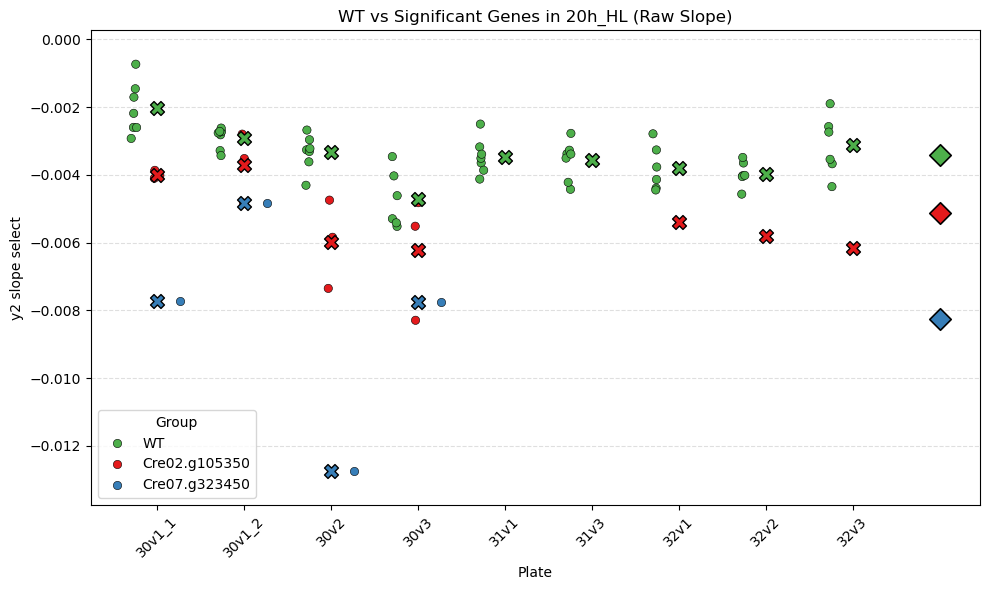

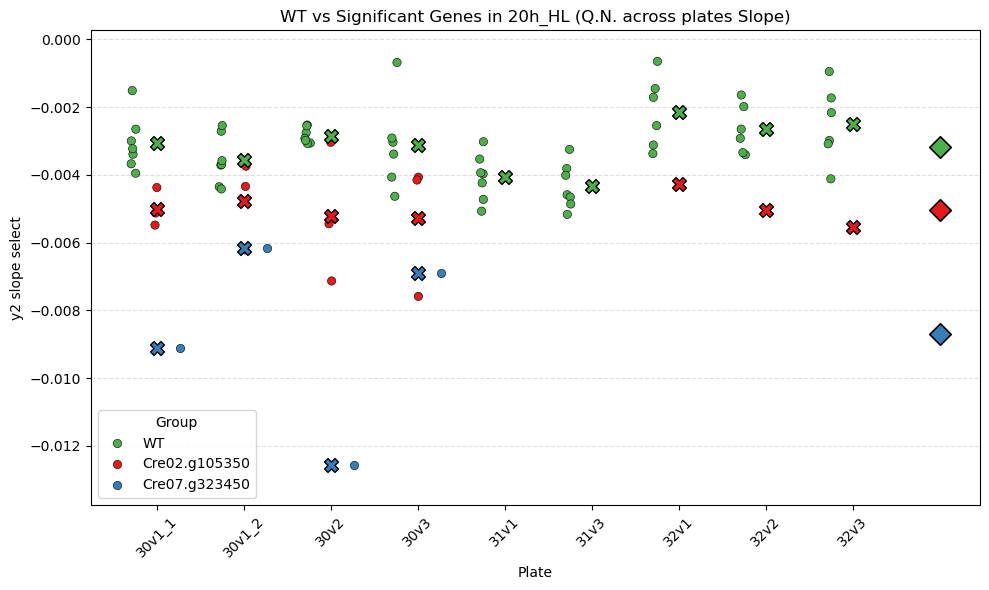

In [86]:
# Define a consistent gene color map
all_expected_genes = {'Cre02.g105350','Cre07.g323450','WT'}
colors = sns.color_palette('Set1', n_colors=len(all_expected_genes))
gene_color_map = dict(zip(sorted(all_expected_genes), colors))



expected_genes = {'Cre02.g105350', 'Cre07.g323450'}
regime = '20h_HL'

# Subset WT and expected mutant rows only
wt_y_vals = wt_df0[wt_df0['light_regime'] == regime]['y2_slope_select']

mutant_y_vals = mutant_df0[
    (mutant_df0['light_regime'] == regime) &
    (mutant_df0['mutated_genes'].isin(expected_genes))
]['y2_slope_select']

# Combine to compute axis limits
combined_y = pd.concat([wt_y_vals, mutant_y_vals])
y_min, y_max = combined_y.min(), combined_y.max()
y_lim = (y_min - 0.001, y_max + 0.001)  # Slight padding


plot_gene_vs_wt_per_plate(
    wt_df0, mutant_df0,
    regime='20h_HL',
    expected_genes={'Cre02.g105350', 'Cre07.g323450'},
    title_suffix='(Raw Slope)',
    gene_color_map=gene_color_map,
    y_lim=y_lim
)

plot_gene_vs_wt_per_plate(
    wt_df=wt_df1,
    mutant_df=mutant_df1,
    regime='20h_HL',
    expected_genes={'Cre02.g105350', 'Cre07.g323450'},
    title_suffix='(Q.N. across plates Slope)',
    gene_color_map=gene_color_map,
    y_lim=y_lim
)


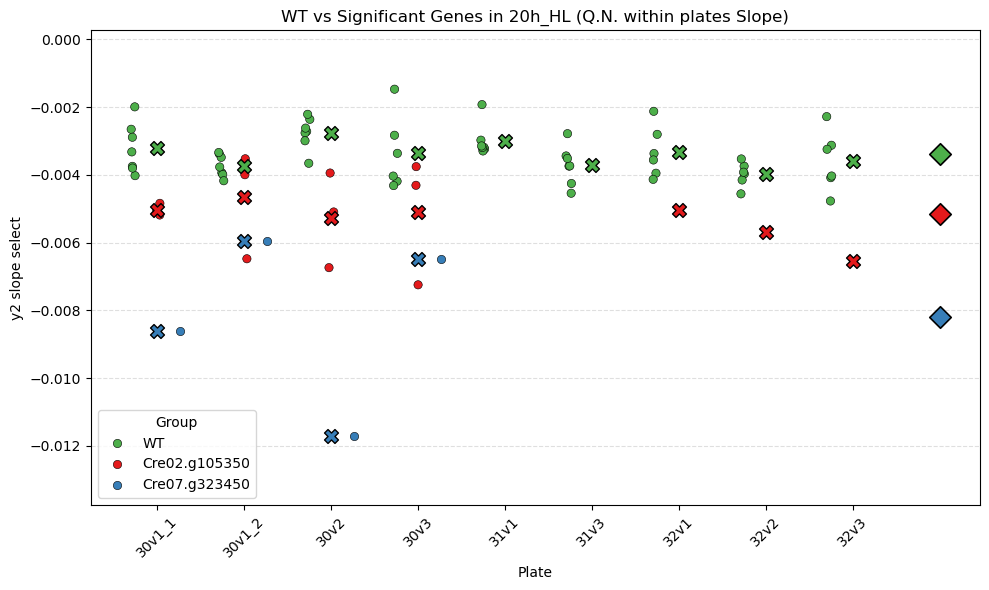

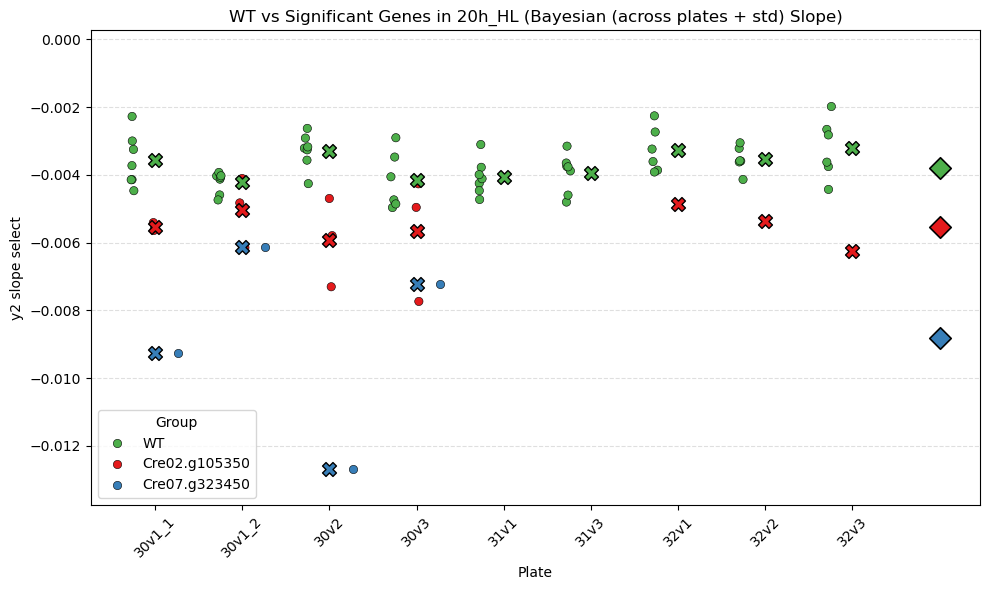

In [87]:
# Plot for wt_df1
plot_gene_vs_wt_per_plate(
    wt_df=wt_df2,
    mutant_df=mutant_df2,
    regime='20h_HL',
    expected_genes={'Cre02.g105350', 'Cre07.g323450'},
    title_suffix='(Q.N. within plates Slope)',
    gene_color_map=gene_color_map,
    y_lim=y_lim
)

plot_gene_vs_wt_per_plate(
    wt_df=wt_df3,
    mutant_df=mutant_df3,
    regime='20h_HL',
    expected_genes={'Cre02.g105350', 'Cre07.g323450'},
    title_suffix='(Bayesian (across plates + std) Slope)',
    gene_color_map=gene_color_map,
    y_lim=y_lim
)

## 1min-1min

In [89]:
## grand mean at different positions
def plot_gene_vs_wt_per_plate(wt_df,
                               mutant_df,
                               regime,
                               expected_genes,
                               title_suffix='',
                               y_col='y2_slope_select',
                               figsize=(10, 6),
                               y_lim=None,
                               gene_color_map=None):
    """
    Plot WT vs expected genes per plate, plus grand means at the end.
    """
    
    # Subset data
    wt_vals = wt_df[wt_df['light_regime'] == regime].copy()
    mutant_vals = mutant_df[
        (mutant_df['light_regime'] == regime) &
        (mutant_df['mutated_genes'].isin(expected_genes))
    ].copy()
    
    if wt_vals.empty or mutant_vals.empty:
        print(f"⚠️ No data for regime '{regime}' and expected genes.")
        return
    
    wt_vals['label'] = 'WT'
    mutant_vals['label'] = mutant_vals['mutated_genes']
    combined = pd.concat([wt_vals, mutant_vals], ignore_index=True)

    # ✅ Define desired plate order and add grand mean placeholders
    desired_order = [
        '30v1', '30v1_1', '30v1_2',
        '30v2', '30v2_1', '30v2_2',
        '30v3', '30v3_1', '30v3_2',
        '31v1', '31v2', '31v3',
        '32v1', '32v2', '32v3'
    ]
    plates_in_data = combined['plate'].unique()
    ordered_plates = [p for p in desired_order if p in plates_in_data]

    # Append grand mean "plates" to the end
    grand_mean_labels = ['WT_mean'] + [f"{gene}_mean" for gene in expected_genes]
    ordered_plates += grand_mean_labels

    # ✅ Create color map if not provided
    if gene_color_map is None:
        all_labels = sorted(set(combined['label']))
        palette = sns.color_palette('Set1', n_colors=len(all_labels))
        gene_color_map = dict(zip(all_labels, palette))
    
    # Plot individual points per plate
    plt.figure(figsize=figsize)
    ax = sns.stripplot(
        data=combined,
        x='plate',
        y=y_col,
        hue='label',
        dodge=True,
        jitter=True,
        size=6,
        edgecolor='black',
        linewidth=0.4,
        palette=gene_color_map,
        order=ordered_plates  # includes future grand mean slots
    )

    # Plot per-plate means as X
    grouped = combined.groupby(['plate', 'label'])[y_col].mean().reset_index()
    for _, row in grouped.iterrows():
        plate = row['plate']
        label = row['label']
        if plate not in ordered_plates:
            continue
        x_pos = ordered_plates.index(plate)
        y_val = row[y_col]
        color = gene_color_map.get(label, 'black')
        ax.scatter(
            x=x_pos,
            y=y_val,
            marker='X',
            s=100,
            color=color,
            edgecolor='black',
            linewidth=1,
            zorder=5
        )

    # ✅ Add grand mean points (WT and each gene) at the end
    grand_means = []

    wt_mean_val = wt_vals[y_col].mean()
    grand_means.append(('WT_mean', 'WT', wt_mean_val))

    for gene in expected_genes:
        gene_vals = mutant_vals[mutant_vals['mutated_genes'] == gene][y_col]
        if not gene_vals.empty:
            grand_means.append((f"{gene}_mean", gene, gene_vals.mean()))

    for plate_label, label, y_val in grand_means:
        x_pos = ordered_plates.index(plate_label)
        color = gene_color_map.get(label, 'black')
        ax.scatter(
            x=x_pos,
            y=y_val,
            marker='D',  # Diamond marker
            s=120,
            color=color,
            edgecolor='black',
            linewidth=1.2,
            zorder=6
        )

    # Formatting
    plt.title(f'WT vs Significant Genes in {regime} {title_suffix}')
    plt.ylabel(y_col.replace('_', ' '))
    plt.xlabel('Plate')
    plt.xticks(rotation=45)
    plt.legend(title='Group')
    plt.grid(axis='y', linestyle='--', alpha=0.4)

    if y_lim:
        plt.ylim(y_lim)

    plt.tight_layout()
    plt.show()


Y-axis limits based on WT + expected genes: (-0.014272724009982599, 0.0016785661212629002)


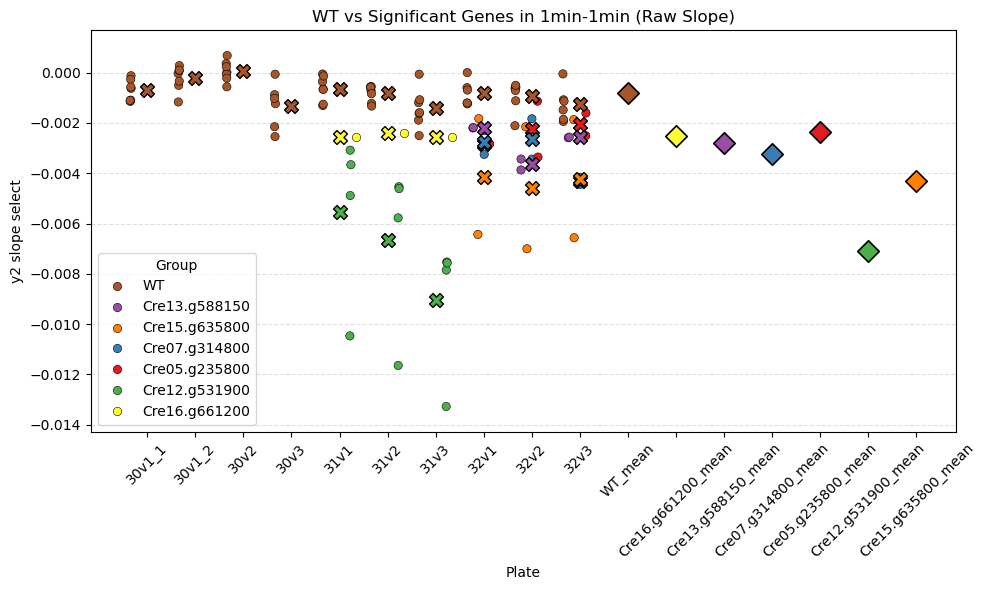

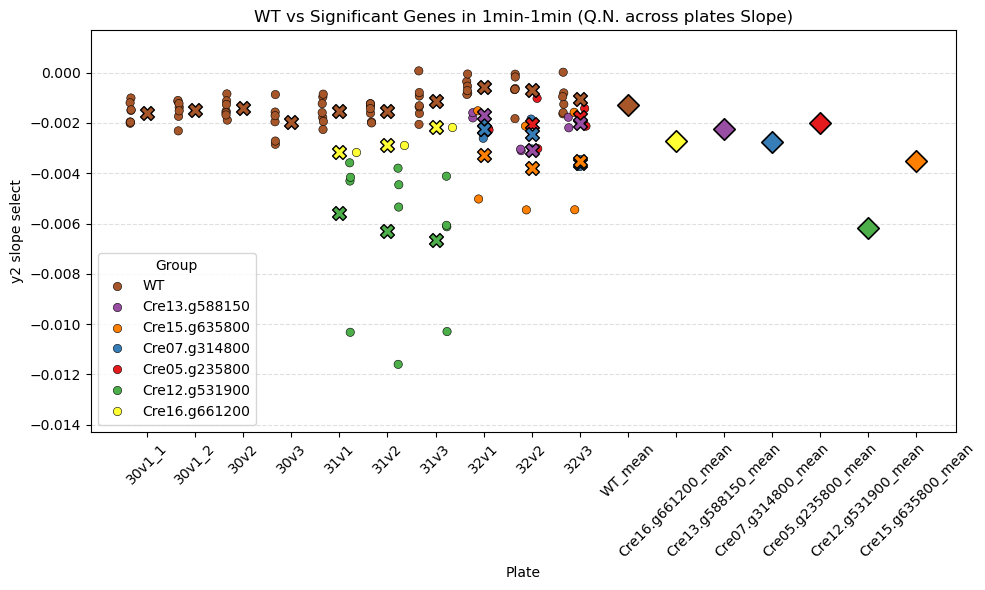

In [96]:
# Define a consistent gene color map
all_expected_genes = {'Cre12.g531900','Cre16.g661200','Cre07.g314800','Cre13.g588150','Cre05.g235800','Cre15.g635800','WT'}
colors = sns.color_palette('Set1', n_colors=len(all_expected_genes))
gene_color_map = dict(zip(sorted(all_expected_genes), colors))



expected_genes = {'Cre12.g531900','Cre16.g661200','Cre07.g314800','Cre13.g588150','Cre05.g235800','Cre15.g635800'}
regime = '1min-1min'

# Subset WT and expected mutant rows only
wt_y_vals = wt_df0[wt_df0['light_regime'] == regime]['y2_slope_select']

mutant_y_vals = mutant_df0[
    (mutant_df0['light_regime'] == regime) &
    (mutant_df0['mutated_genes'].isin(expected_genes))
]['y2_slope_select']

# Combine to compute axis limits
combined_y = pd.concat([wt_y_vals, mutant_y_vals])
y_min, y_max = combined_y.min(), combined_y.max()
y_lim = (y_min - 0.001, y_max + 0.001)  # Slight padding

print("Y-axis limits based on WT + expected genes:", y_lim)

# Plot for wt_df0
plot_gene_vs_wt_per_plate(
    wt_df=wt_df0,
    mutant_df=mutant_df0,
    regime='1min-1min',
    expected_genes={'Cre12.g531900','Cre16.g661200','Cre07.g314800','Cre13.g588150','Cre05.g235800','Cre15.g635800'},
    title_suffix='(Raw Slope)',
    gene_color_map=gene_color_map,
    y_lim=y_lim
)


plot_gene_vs_wt_per_plate(
    wt_df=wt_df1,
    mutant_df=mutant_df1,
    regime='1min-1min',
    expected_genes={'Cre12.g531900','Cre16.g661200','Cre07.g314800','Cre13.g588150','Cre05.g235800','Cre15.g635800'},
    title_suffix='(Q.N. across plates Slope)',
    gene_color_map=gene_color_map,
    y_lim=y_lim
)


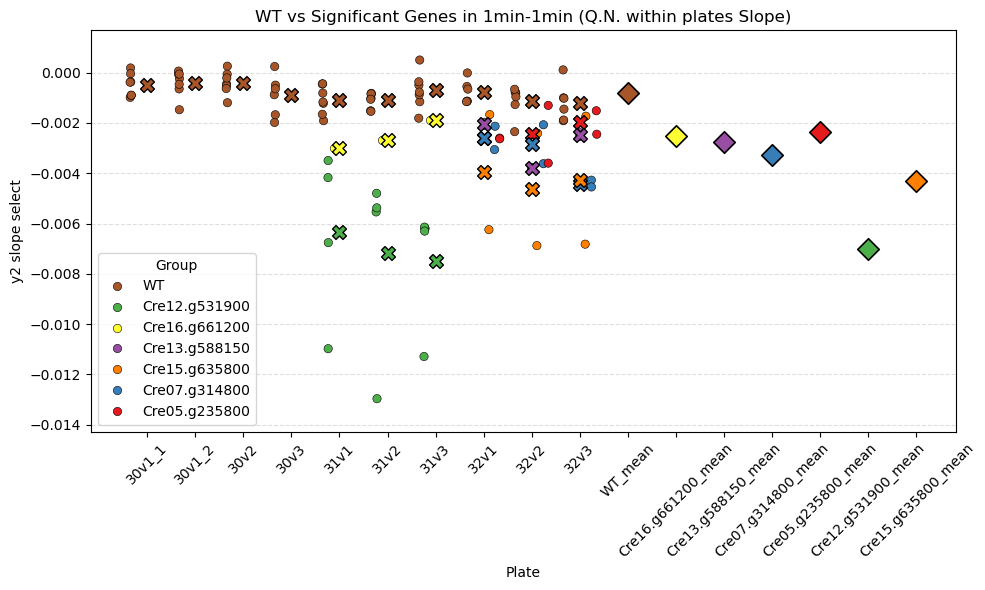

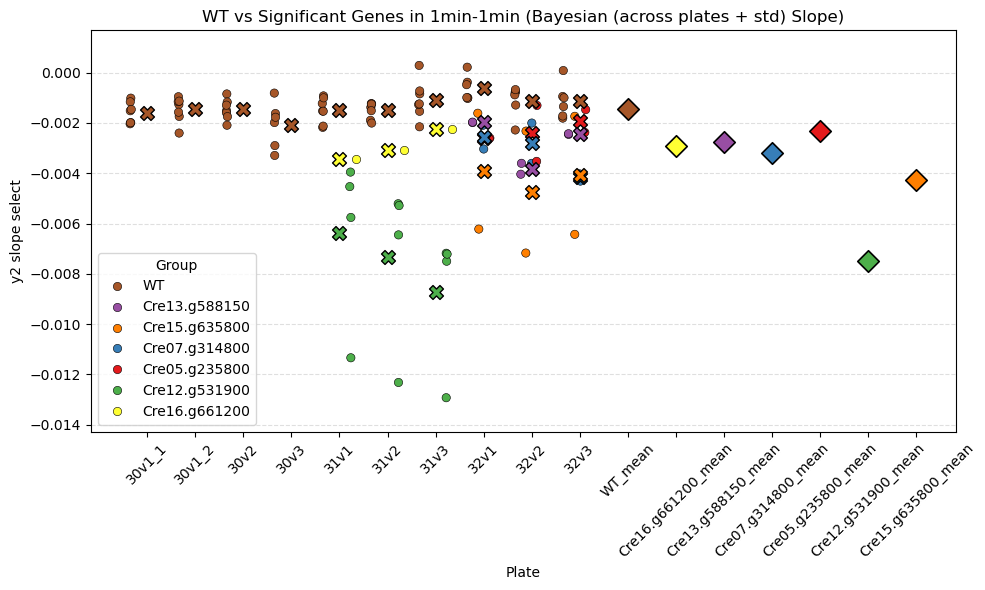

In [100]:

plot_gene_vs_wt_per_plate(
    wt_df=wt_df2,
    mutant_df=mutant_df2,
    regime='1min-1min',
    expected_genes={'Cre12.g531900','Cre16.g661200','Cre07.g314800','Cre13.g588150','Cre05.g235800','Cre15.g635800'},
    title_suffix='(Q.N. within plates Slope)',
    gene_color_map=gene_color_map,
    y_lim=y_lim
)

plot_gene_vs_wt_per_plate(
    wt_df=wt_df3,
    mutant_df=mutant_df3,
    regime='1min-1min',
    expected_genes={'Cre12.g531900','Cre16.g661200','Cre07.g314800','Cre13.g588150','Cre05.g235800','Cre15.g635800'},
    title_suffix='(Bayesian (across plates + std) Slope)',
    gene_color_map=gene_color_map,
    y_lim=y_lim
)

## 30s-30s

Y-axis limits based on WT + expected genes: (-0.0129889156102156, 0.0015340761136487)


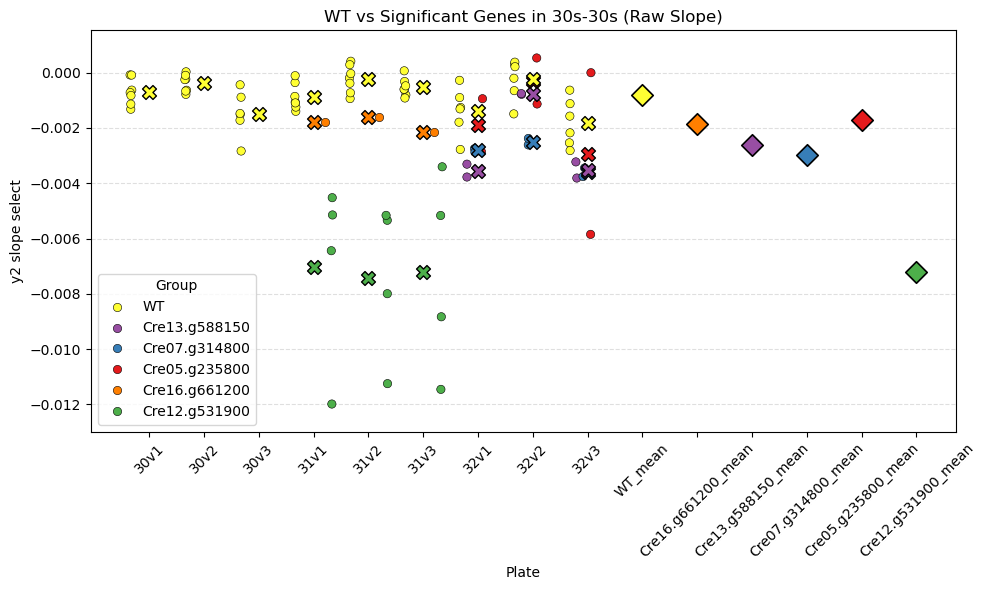

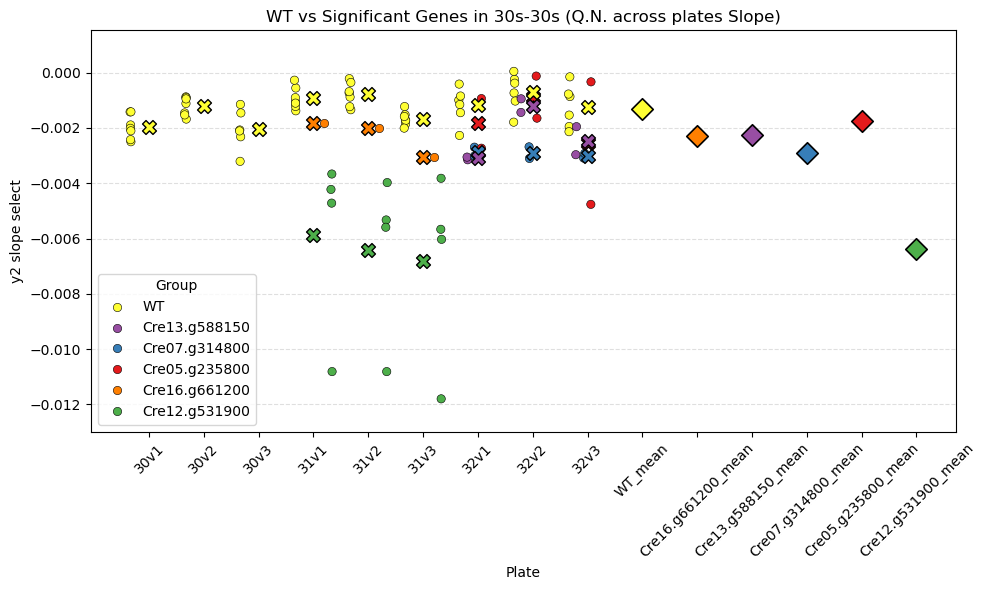

In [92]:
all_expected_genes = {'Cre12.g531900','Cre16.g661200','Cre07.g314800','Cre13.g588150','Cre05.g235800','WT'}
colors = sns.color_palette('Set1', n_colors=len(all_expected_genes))
gene_color_map = dict(zip(sorted(all_expected_genes), colors))


expected_genes = {'Cre12.g531900','Cre16.g661200','Cre07.g314800','Cre13.g588150','Cre05.g235800'}
regime = '30s-30s'

# Subset WT and expected mutant rows only
wt_y_vals = wt_df0[wt_df0['light_regime'] == regime]['y2_slope_select']

mutant_y_vals = mutant_df0[
    (mutant_df0['light_regime'] == regime) &
    (mutant_df0['mutated_genes'].isin(expected_genes))
]['y2_slope_select']

# Combine to compute axis limits
combined_y = pd.concat([wt_y_vals, mutant_y_vals])
y_min, y_max = combined_y.min(), combined_y.max()
y_lim = (y_min - 0.001, y_max + 0.001)  # Slight padding

print("Y-axis limits based on WT + expected genes:", y_lim)

# Plot for wt_df0
plot_gene_vs_wt_per_plate(
    wt_df=wt_df0,
    mutant_df=mutant_df0,
    regime='30s-30s',
    expected_genes={'Cre12.g531900','Cre16.g661200','Cre07.g314800','Cre13.g588150','Cre05.g235800'},
    title_suffix='(Raw Slope)',
    gene_color_map=gene_color_map,
    y_lim=y_lim
)

plot_gene_vs_wt_per_plate(
    wt_df=wt_df1,
    mutant_df=mutant_df1,
    regime='30s-30s',
    expected_genes={'Cre12.g531900','Cre16.g661200','Cre07.g314800','Cre13.g588150','Cre05.g235800'},
    title_suffix='(Q.N. across plates Slope)',
    gene_color_map=gene_color_map,
    y_lim=y_lim
)

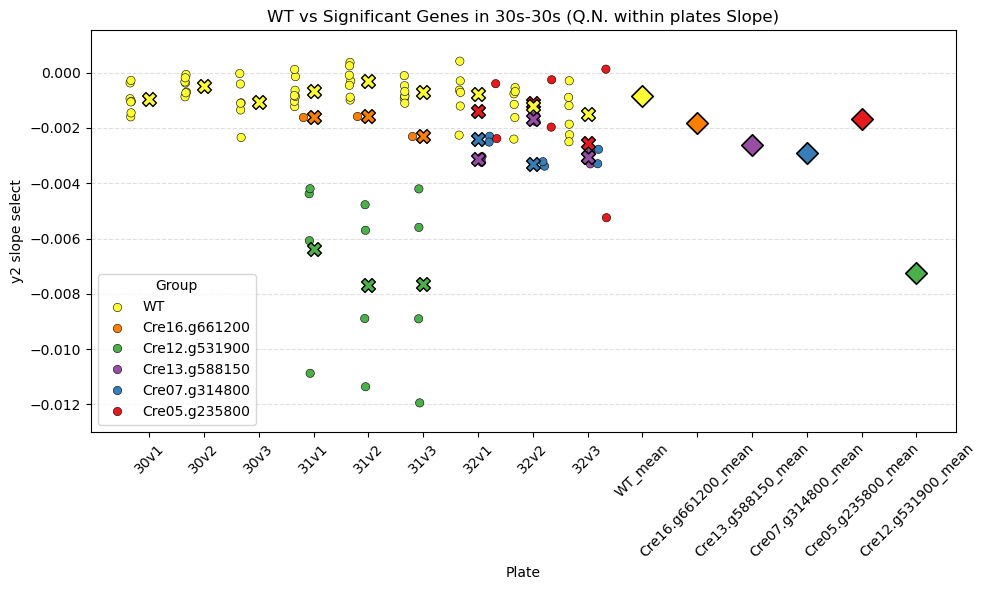

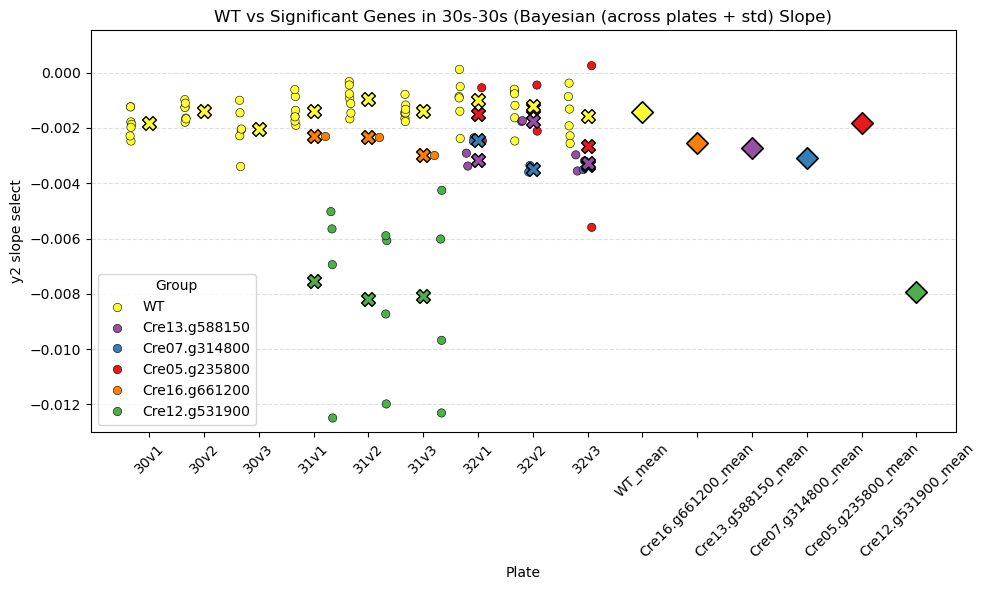

In [93]:

plot_gene_vs_wt_per_plate(
    wt_df=wt_df2,
    mutant_df=mutant_df2,
    regime='30s-30s',
    expected_genes={'Cre12.g531900','Cre16.g661200','Cre07.g314800','Cre13.g588150','Cre05.g235800'},
    title_suffix='(Q.N. within plates Slope)',
    gene_color_map=gene_color_map,
    y_lim=y_lim
)

plot_gene_vs_wt_per_plate(
    wt_df=wt_df3,
    mutant_df=mutant_df3,
    regime='30s-30s',
    expected_genes={'Cre12.g531900','Cre16.g661200','Cre07.g314800','Cre13.g588150','Cre05.g235800'},
    title_suffix='(Bayesian (across plates + std) Slope)',
    gene_color_map=gene_color_map,
    y_lim=y_lim
)